# Preparation and initialization

Install lazy predict and import all necessary tools:

In [1]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lightgbm

In [1]:
# Importing all necessary tools
# Importing necessary libraries for LazyClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from skopt import gp_minimize
from sklearn.svm import NuSVC
import optuna

#Importing table and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing dataset splitting and imputing libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import LeaveOneOut



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# Upload the data set and process the raw data set

In [2]:
#Reading .csv file for complete, cleaned dataset
df_path='C:/Users/USER/Documents/Kuliah/Tugas Akhir/bahan ta/Data science materials science/database/llzo_dataset_clean.csv'


In [3]:
df_raw=pd.read_csv(df_path)
df = df_raw[0:176]
df.head(176)

,source,li_sto,la_sto,zr_sto,li_dop_sto,la_dop_sto,zr_dop_sto,rel_dens_%,conductivity,log_cond,good_cond,li_dopant,la_dopant,zr_dopant,li_dop_ionicrad,la_dop_ionicrad,zr_dop_ionicrad,li_dop_enev,la_dop_enev,zr_dop_enev
0,10.1016/j.ssi.2017.11.027,5.00,3.00,0.00,0.00,0.00,2.00,nan,0.00,-6.14,0.00,NaN,NaN,ta,0.00,0.00,78.00,0.00,0.00,1.50
1,10.1016/j.jpowsour.2012.01.094,5.50,3.00,0.50,0.00,0.00,1.50,nan,0.00,-4.03,0.00,NaN,NaN,ta,0.00,0.00,78.00,0.00,0.00,1.50
2,10.1016/j.ssi.2017.09.005,6.50,2.50,1.00,0.00,0.50,1.00,nan,0.00,-3.82,0.00,NaN,ba,ta,0.00,156.00,78.00,0.00,0.89,1.50
3,10.1039/c2ra01042a,6.50,2.50,1.00,0.00,0.50,1.00,nan,0.00,-4.05,0.00,NaN,ba,ta,0.00,156.00,78.00,0.00,0.89,1.50
4,10.1016/j.ssi.2017.11.027,6.05,2.95,1.00,0.00,0.05,1.00,nan,0.00,-3.89,0.00,NaN,ca,ta,0.00,126.00,78.00,0.00,1.00,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,10.1016/j.ceramint.2018.01.065,7.00,3.00,2.00,0.00,0.00,0.00,87.70,0.00,-3.73,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00
172,10.1111/jace.14736,7.00,3.00,2.00,0.00,0.00,0.00,88.70,0.00,-4.59,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00
173,10.1016/j.matlet.2018.08.006,7.00,3.00,2.00,0.00,0.00,0.00,84.60,0.00,-4.00,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00
174,10.1016/j.jpowsour.2013.10.089,6.85,3.09,2.07,0.00,0.00,0.00,nan,0.00,-3.77,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00


Drop unnecessary columns for prediction

In [4]:
#Dropping unnecessary columns for prediction
df = df.drop(['conductivity','log_cond','li_dopant','la_dopant','zr_dopant','source'], axis=1)
df.head()

,li_sto,la_sto,zr_sto,li_dop_sto,la_dop_sto,zr_dop_sto,rel_dens_%,good_cond,li_dop_ionicrad,la_dop_ionicrad,zr_dop_ionicrad,li_dop_enev,la_dop_enev,zr_dop_enev
0,5.00,3.00,0.00,0.00,0.00,2.00,nan,0.00,0.00,0.00,78.00,0.00,0.00,1.50
1,5.50,3.00,0.50,0.00,0.00,1.50,nan,0.00,0.00,0.00,78.00,0.00,0.00,1.50
2,6.50,2.50,1.00,0.00,0.50,1.00,nan,0.00,0.00,156.00,78.00,0.00,0.89,1.50
3,6.50,2.50,1.00,0.00,0.50,1.00,nan,0.00,0.00,156.00,78.00,0.00,0.89,1.50
4,6.05,2.95,1.00,0.00,0.05,1.00,nan,0.00,0.00,126.00,78.00,0.00,1.00,1.50


# Lazy classifier phase

Drop the features with nan

In [5]:
#Defining X (features) and y (target property) for cut dataset
X = df.dropna().drop('good_cond', axis=1)
y = df.dropna()['good_cond']
print(X)

X_full = df.drop('good_cond', axis=1)
y_full = df['good_cond']

     li_sto  la_sto  zr_sto  li_dop_sto  la_dop_sto  zr_dop_sto  rel_dens_%  \
5      6.00    3.00    1.00        0.00        0.00        1.00       84.00   
6      6.00    3.00    1.00        0.00        0.00        1.00       86.00   
9      6.20    3.00    1.20        0.00        0.00        0.80       84.00   
10     6.20    3.00    1.20        0.00        0.00        0.80       76.00   
11     6.25    3.00    1.25        0.00        0.00        0.75       83.00   
..      ...     ...     ...         ...         ...         ...         ...   
167    6.85    3.00    2.00        0.05        0.00        0.00       94.00   
169    7.00    3.00    2.00        0.00        0.00        0.00       96.70   
171    7.00    3.00    2.00        0.00        0.00        0.00       87.70   
172    7.00    3.00    2.00        0.00        0.00        0.00       88.70   
173    7.00    3.00    2.00        0.00        0.00        0.00       84.60   

     li_dop_ionicrad  la_dop_ionicrad  zr_dop_ionic

Perform lazy classifier once to get the list of all models:

In [6]:
#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#Using LazyRegressor for cut dataset
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
modellist = list(models.index.values) # Get the list of the methods' names
models



100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.76it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.93,0.94,0.94,0.93,0.03
DecisionTreeClassifier,0.93,0.94,0.94,0.93,0.02
NuSVC,0.93,0.94,0.94,0.93,0.07
CalibratedClassifierCV,0.93,0.94,0.94,0.93,0.23
LogisticRegression,0.93,0.94,0.94,0.93,0.10
LGBMClassifier,0.83,0.86,0.86,0.83,0.13
AdaBoostClassifier,0.86,0.85,0.85,0.86,0.57
ExtraTreesClassifier,0.86,0.85,0.85,0.86,0.17
SVC,0.86,0.85,0.85,0.86,0.02


Perform replications with 75% data as the training set. The R2 scores of the model are recorded. The models are also ranked according to the R2 scores. These scores and rank are then averaged.

In [7]:
Nrep = 1000 # Number of replications, the higher the better
r2score = np.zeros((len(modellist),Nrep)) # Initialize the r2score
position = np.zeros((len(modellist),Nrep)) # Initialize the position (rank)
for LOOP in range(0,Nrep):

    #Splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = LOOP)

    #Using LazyRegressor for cut dataset
    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    modelstemp, predictionstemp = clf.fit(X_train, X_test, y_train, y_test)
 
    modellisttemp = list(modelstemp.index.values)
    
    for i, mdl in zip(range(0,len(modellist)),modellist):
        search_pos = int(modellisttemp.index(models.index.values[i]))
        r2score[i,LOOP] = modelstemp.iloc[:,0][search_pos]
        position[i,LOOP] = search_pos
    


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 21.42it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 21.35it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 22.09it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 20.04it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 18.94it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 21.92it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 23.76it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 21.52it/s]


In [8]:
print('------------------ CUT DATASET ------------------')
idx = np.argmax(np.mean(r2score, axis=1))
print('The best model according to the mean acc. score is ',modellist[idx],'with score',max(np.mean(r2score,axis=1)))
idx = np.argmax(np.median(r2score,axis=1))
print('The best model according to the median acc. score is ',modellist[idx],'with score',max(np.median(r2score,axis=1)))
idx = np.argmin(np.mean(position,axis=1))
print('The best model according to the mean ranking is ',modellist[idx],'with score',min(np.mean(position,axis=1)))
idx = np.argmin(np.median(position,axis=1))
print('The best model according to the median ranking is ',modellist[idx],'with score',min(np.median(position,axis=1)))

------------------ CUT DATASET ------------------
The best model according to the mean acc. score is  LGBMClassifier with score 0.8211034482758621
The best model according to the median acc. score is  NuSVC with score 0.8275862068965517
The best model according to the mean ranking is  LGBMClassifier with score 6.493
The best model according to the median ranking is  LGBMClassifier with score 5.0


In [9]:
modellist_df = pd.DataFrame(modellist).rename(columns = {0:'Model'})
mean_df = pd.DataFrame(np.mean(r2score, axis = 1)).rename(columns = {0:'Accuracy mean'})
med_df = pd.DataFrame(np.median(r2score, axis = 1)).rename(columns = {0:'Accuracy median'})
rankmean_df = pd.DataFrame(np.mean(position, axis = 1)).rename(columns = {0:'Rank mean'})
rankmed_df = pd.DataFrame(np.median(position, axis = 1)).rename(columns = {0:'Rank median'})
models_df = pd.concat([modellist_df, mean_df, rankmean_df, med_df, rankmed_df], axis = 1)
models_df.sort_values(['Accuracy mean', 'Accuracy median'], ascending = False).head(5)

,Model,Accuracy mean,Rank mean,Accuracy median,Rank median
5,LGBMClassifier,0.82,6.49,0.83,5.00
13,RandomForestClassifier,0.82,6.78,0.83,5.00
2,NuSVC,0.81,7.44,0.83,7.00
11,BaggingClassifier,0.81,7.82,0.83,7.00
14,XGBClassifier,0.80,8.99,0.79,8.00


### The three model candidates are LGBM classifier, random forest, and NuSVC

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
Nrep = 200 # Number of replications, the higher the better
r2score_full = np.zeros((len(modellist),Nrep)) # Initialize the r2score
position_full = np.zeros((len(modellist),Nrep)) # Initialize the position (rank)
for LOOP in range(0,Nrep):

    #Splitting
    X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.25, random_state = LOOP)

    #Imputing X_train and X_test
    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_full))
    X_train_imputed.columns = X_train_full.columns
    X_train_imputed.index = X_train_full.index

    X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test_full))
    X_test_imputed.columns = X_test_full.columns
    X_test_imputed.index = X_test_full.index
    
    #Using LazyRegressor for cut dataset
    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    modelstemp,predictionstemp = clf.fit(X_train_imputed, X_test_imputed, y_train_full, y_test_full)
 
    modellisttemp = list(modelstemp.index.values)
    
    for i, mdl in zip(range(0,len(modellist)),modellist):
        search_pos = int(modellisttemp.index(models.index.values[i]))
        r2score_full[i,LOOP] = modelstemp.iloc[:,0][search_pos]
        position_full[i,LOOP] = search_pos
    


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 24.57it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 19.81it/s]


In [18]:
print('------------------ IMPUTED DATASET ------------------')
idx_full = np.argmax(np.mean(r2score_full,axis=1))
print('The best model according to the mean acc. score is ',modellist[idx_full],'with score',max(np.mean(r2score_full,axis=1)))
idx_full = np.argmax(np.median(r2score_full,axis=1))
print('The best model according to the median acc. score is ',modellist[idx_full],'with score',max(np.median(r2score_full,axis=1)))
idx_full = np.argmin(np.mean(position_full,axis=1))
print('The best model according to the mean ranking is ',modellist[idx_full],'with score',min(np.mean(position_full,axis=1)))
idx_full = np.argmin(np.median(position_full,axis=1))
print('The best model according to the median ranking is ',modellist[idx_full],'with score',min(np.median(position_full,axis=1)))

------------------ IMPUTED DATASET ------------------
The best model according to the mean acc. score is  NuSVC with score 0.7655681818181819
The best model according to the median acc. score is  RandomForestClassifier with score 0.7727272727272727
The best model according to the mean ranking is  NuSVC with score 6.42
The best model according to the median ranking is  NuSVC with score 5.0


#### Using cut dataset leads to better results, while LGBMClassifier consistently scores the best, score-wise and ranking-wise

# Prediction using all data set

Start by leave-one-out-cross validation first

In [6]:
# Leave one out cross-validation (un-optimized)
cvpred = np.zeros([len(X)]) #Creating array of zeros as big as the length of X
Xnp = X.to_numpy() #Converts feature set to np array
ynp = y.to_numpy() #Converts target property to numpy
for i in range(0,len(X)):
    xpred = Xnp[i,:].reshape(1,-1) #Define X_val
    XLOO = np.delete(Xnp,i,axis=0) #Define X_train
    yLOO = np.delete(ynp,i).reshape(-1,1) #Define y_train
    modelLOO = LGBMClassifier() #Define model
    modelLOO.fit(XLOO, yLOO) #Fitting model to training set
    cvpred[i] = modelLOO.predict(xpred) #Adding predict score to array of zeros
LOOCVscore = np.sum(cvpred == ynp)/len(X)

print('LOOCV error of LGBMClassifier is ', LOOCVscore)

LOOCV error of LGBMClassifier is  0.8230088495575221


In [7]:
#Defining LOOCV function, takes input of X, y, and model and returns the mean score
def LOO_cross_val (X, y, model):
    cvpred = np.zeros([len(X)]) #Creating array of zeros as big as the length of X
    Xnp = X.to_numpy() #Converts feature set to np array
    ynp = y.to_numpy() #Converts target property to numpy
    for i in range(0,len(X)):
        xpred = Xnp[i,:].reshape(1,-1) #Define X_val
        XLOO = np.delete(Xnp,i,axis=0) #Define X_train
        yLOO = np.delete(ynp,i).reshape(-1,1) #Define y_train
        modelLOO = model #Define model
        modelLOO.fit(XLOO, yLOO) #Fitting model to training set
        cvpred[i] = modelLOO.predict(xpred) #Adding predict score to array of zeros
    LOOCVscore = np.sum(cvpred == ynp)/len(X)
    return LOOCVscore

In [8]:
from sklearn.ensemble import BaggingClassifier
candidates = {'NuSVC' : NuSVC(), 'LGBM' : LGBMClassifier(), 'RF': RandomForestClassifier()}
candidates
for candidate, model in candidates.items():
    print('The candidate {} scored {} in a baseline LOOCV'.format(candidate, LOO_cross_val(X, y, model)))

The candidate NuSVC scored 0.8495575221238938 in a baseline LOOCV
The candidate LGBM scored 0.8230088495575221 in a baseline LOOCV
The candidate RF scored 0.8053097345132744 in a baseline LOOCV


# Nested cross validation to validate Bayesian optimization's effectiveness

Nested cross validation optimizing towards LOOCV score on the training set, measuring the score improvement on the test set.

In [13]:
from sklearn.model_selection import StratifiedKFold
#Split train data to 5 outer folds and 4 inner folds
skfold_outer = StratifiedKFold(n_splits=5, shuffle = True, random_state = None)

In [15]:
#Executing nested cross-validation for DecisionTree
i = 1
folds = []
for train_index_outer, test_index_outer in skfold_outer.split(X, y):
    fold_data = {}
    
    #Splitting the outer folds
    print("Outer Fold %s" % i)
    data_X_train = X.iloc[train_index_outer]
    data_y_train = y.iloc[train_index_outer]
    data_X_test = X.iloc[test_index_outer]
    data_y_test = y.iloc[test_index_outer]
    
    #Testing on test_index_outer and LOOCV score on train_index_outer using one of the candidates, RFClassifier
    clf_base = LGBMClassifier(random_state = None)
    fold_data['outer_fold'] = i
    clf_base_fit = clf_base.fit(data_X_train, data_y_train)
    clf_base_test = clf_base_fit.score(data_X_test, data_y_test)
    fold_data['Base test score'] = clf_base_test
    fold_data['Base LOOCV score'] = LOO_cross_val(data_X_train, data_y_train, clf_base)
    
    
    #Optimization process in inner fold, claiming best parameters
    def objective(trial):
        num_leaves_lgbm = trial.suggest_int('num_leaves', 10, 50)
        learning_rate_lgbm = trial.suggest_loguniform('learning_rate', 1e-4, 1e2)
        n_estimators_lgbm = trial.suggest_int('n_estimators', 50, 500)
        subsample_for_bin_lgbm = trial.suggest_int('subsample_for_bin', 1e5, 3e5)
    
        classifier = LGBMClassifier(random_state = None,
                                num_leaves = num_leaves_lgbm,
                                subsample_for_bin = subsample_for_bin_lgbm,
                                n_estimators = n_estimators_lgbm,
                                learning_rate = learning_rate_lgbm)
                                
        score = LOO_cross_val(data_X_train, data_y_train, classifier)
        return score

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50, n_jobs = -1, gc_after_trial=True)
    print('Best hyperparameters:\n{}'.format(study.best_params))
    print('Best LOOCV score:\n{}'.format(study.best_value))
        
    #Entering optimization results
    fold_data['best_param'] = study.best_params
    fold_data['Optimized LOOCV score'] = study.best_value
    
    #Testing on test data in outer loop
    model = LGBMClassifier(random_state=None,\
                           num_leaves=fold_data['best_param']['num_leaves'],\
                           learning_rate=fold_data['best_param']['learning_rate'],\
                           n_estimators=fold_data['best_param']['n_estimators'],\
                           subsample_for_bin=fold_data['best_param']['subsample_for_bin'])

    fit = model.fit(data_X_train, data_y_train)
    test_score = fit.score(data_X_test, data_y_test)
    fold_data['Optimized test score'] = test_score
    print("Test Outer Score: %s" % test_score, '\n')
    
    folds.append(fold_data)
    
    i+=1

Outer Fold 1


[I 2020-12-19 21:31:14,143] A new study created in memory with name: no-name-10df0d24-8b0b-4e9c-912e-f268758dba2b
[I 2020-12-19 21:31:20,235] Trial 1 finished with value: 0.8 and parameters: {'num_leaves': 35, 'learning_rate': 0.7079377147694224, 'n_estimators': 67, 'subsample_for_bin': 164352}. Best is trial 1 with value: 0.8.
[I 2020-12-19 21:31:22,218] Trial 2 finished with value: 0.8666666666666667 and parameters: {'num_leaves': 38, 'learning_rate': 0.04811443995457457, 'n_estimators': 87, 'subsample_for_bin': 238434}. Best is trial 2 with value: 0.8666666666666667.
[I 2020-12-19 21:31:23,989] Trial 4 finished with value: 0.7555555555555555 and parameters: {'num_leaves': 38, 'learning_rate': 2.8948898451106246, 'n_estimators': 63, 'subsample_for_bin': 281386}. Best is trial 2 with value: 0.8666666666666667.
[I 2020-12-19 21:31:25,977] Trial 5 finished with value: 0.25555555555555554 and parameters: {'num_leaves': 25, 'learning_rate': 23.26881829231509, 'n_estimators': 73, 'subsampl

[I 2020-12-19 21:33:58,246] Trial 30 finished with value: 0.8111111111111111 and parameters: {'num_leaves': 22, 'learning_rate': 0.03819468235585616, 'n_estimators': 429, 'subsample_for_bin': 101201}. Best is trial 2 with value: 0.8666666666666667.
[I 2020-12-19 21:34:16,939] Trial 33 finished with value: 0.8444444444444444 and parameters: {'num_leaves': 28, 'learning_rate': 0.0057870064940958865, 'n_estimators': 429, 'subsample_for_bin': 239577}. Best is trial 2 with value: 0.8666666666666667.
[I 2020-12-19 21:34:26,248] Trial 34 finished with value: 0.8444444444444444 and parameters: {'num_leaves': 20, 'learning_rate': 0.005029131936279095, 'n_estimators': 490, 'subsample_for_bin': 175904}. Best is trial 2 with value: 0.8666666666666667.
[I 2020-12-19 21:34:27,345] Trial 35 finished with value: 0.7222222222222222 and parameters: {'num_leaves': 19, 'learning_rate': 0.0006695763290034725, 'n_estimators': 433, 'subsample_for_bin': 109597}. Best is trial 2 with value: 0.8666666666666667.

Best hyperparameters:
{'num_leaves': 38, 'learning_rate': 0.04811443995457457, 'n_estimators': 87, 'subsample_for_bin': 238434}
Best LOOCV score:
0.8666666666666667
Test Outer Score: 0.782608695652174 

Outer Fold 2


[I 2020-12-19 21:35:18,778] A new study created in memory with name: no-name-03c82c8f-3815-4153-9ad6-424d638f6945
[I 2020-12-19 21:35:25,363] Trial 3 finished with value: 0.4777777777777778 and parameters: {'num_leaves': 25, 'learning_rate': 2.283094113207965, 'n_estimators': 189, 'subsample_for_bin': 188493}. Best is trial 3 with value: 0.4777777777777778.
[I 2020-12-19 21:35:27,751] Trial 0 finished with value: 0.2777777777777778 and parameters: {'num_leaves': 26, 'learning_rate': 53.23087343675248, 'n_estimators': 270, 'subsample_for_bin': 271780}. Best is trial 3 with value: 0.4777777777777778.
[I 2020-12-19 21:35:30,139] Trial 2 finished with value: 0.5222222222222223 and parameters: {'num_leaves': 15, 'learning_rate': 5.416190598829431, 'n_estimators': 339, 'subsample_for_bin': 200285}. Best is trial 2 with value: 0.5222222222222223.
[I 2020-12-19 21:35:31,946] Trial 1 finished with value: 0.7777777777777778 and parameters: {'num_leaves': 10, 'learning_rate': 0.09722777409325929,

[I 2020-12-19 21:36:55,031] Trial 31 finished with value: 0.8111111111111111 and parameters: {'num_leaves': 36, 'learning_rate': 0.003852954472875866, 'n_estimators': 142, 'subsample_for_bin': 293362}. Best is trial 4 with value: 0.8111111111111111.
[I 2020-12-19 21:36:55,304] Trial 32 finished with value: 0.8222222222222222 and parameters: {'num_leaves': 27, 'learning_rate': 0.03568122573738175, 'n_estimators': 86, 'subsample_for_bin': 129475}. Best is trial 32 with value: 0.8222222222222222.
[I 2020-12-19 21:37:01,070] Trial 35 finished with value: 0.8111111111111111 and parameters: {'num_leaves': 28, 'learning_rate': 0.009633960746244749, 'n_estimators': 86, 'subsample_for_bin': 157267}. Best is trial 32 with value: 0.8222222222222222.
[I 2020-12-19 21:37:02,102] Trial 36 finished with value: 0.7777777777777778 and parameters: {'num_leaves': 28, 'learning_rate': 0.16481670408842403, 'n_estimators': 91, 'subsample_for_bin': 132427}. Best is trial 32 with value: 0.8222222222222222.
[I

Best hyperparameters:
{'num_leaves': 27, 'learning_rate': 0.03568122573738175, 'n_estimators': 86, 'subsample_for_bin': 129475}
Best LOOCV score:
0.8222222222222222
Test Outer Score: 0.9130434782608695 

Outer Fold 3


[I 2020-12-19 21:37:43,208] A new study created in memory with name: no-name-498dac31-25d7-45a3-88cc-9e50c4eef2db
[I 2020-12-19 21:37:46,224] Trial 2 finished with value: 0.6888888888888889 and parameters: {'num_leaves': 48, 'learning_rate': 16.401976192279154, 'n_estimators': 85, 'subsample_for_bin': 126087}. Best is trial 2 with value: 0.6888888888888889.
[I 2020-12-19 21:37:58,999] Trial 4 finished with value: 0.6222222222222222 and parameters: {'num_leaves': 41, 'learning_rate': 10.263484603224839, 'n_estimators': 497, 'subsample_for_bin': 152465}. Best is trial 2 with value: 0.6888888888888889.
[I 2020-12-19 21:38:01,900] Trial 0 finished with value: 0.8222222222222222 and parameters: {'num_leaves': 12, 'learning_rate': 0.004741189049811898, 'n_estimators': 321, 'subsample_for_bin': 226947}. Best is trial 0 with value: 0.8222222222222222.
[I 2020-12-19 21:38:03,418] Trial 1 finished with value: 0.8333333333333334 and parameters: {'num_leaves': 25, 'learning_rate': 0.05566151341883

[I 2020-12-19 21:39:21,401] Trial 32 finished with value: 0.8 and parameters: {'num_leaves': 36, 'learning_rate': 0.1763649156915292, 'n_estimators': 232, 'subsample_for_bin': 117424}. Best is trial 28 with value: 0.8888888888888888.
[I 2020-12-19 21:39:23,818] Trial 33 finished with value: 0.7888888888888889 and parameters: {'num_leaves': 40, 'learning_rate': 0.16932140221379466, 'n_estimators': 226, 'subsample_for_bin': 118670}. Best is trial 28 with value: 0.8888888888888888.
[I 2020-12-19 21:39:27,409] Trial 34 finished with value: 0.8 and parameters: {'num_leaves': 28, 'learning_rate': 0.015415067360145123, 'n_estimators': 89, 'subsample_for_bin': 150784}. Best is trial 28 with value: 0.8888888888888888.
[I 2020-12-19 21:39:28,212] Trial 35 finished with value: 0.7888888888888889 and parameters: {'num_leaves': 42, 'learning_rate': 0.42333513578743887, 'n_estimators': 88, 'subsample_for_bin': 125682}. Best is trial 28 with value: 0.8888888888888888.
[I 2020-12-19 21:39:28,529] Tria

Best hyperparameters:
{'num_leaves': 30, 'learning_rate': 0.05770586475941675, 'n_estimators': 66, 'subsample_for_bin': 142124}
Best LOOCV score:
0.8888888888888888
Test Outer Score: 0.8260869565217391 

Outer Fold 4


[I 2020-12-19 21:40:03,424] A new study created in memory with name: no-name-30b146ef-641c-4e5f-b199-a80a635241a1
[I 2020-12-19 21:40:24,202] Trial 0 finished with value: 0.7912087912087912 and parameters: {'num_leaves': 24, 'learning_rate': 0.0005867182090264335, 'n_estimators': 341, 'subsample_for_bin': 175730}. Best is trial 0 with value: 0.7912087912087912.
[I 2020-12-19 21:40:31,813] Trial 1 finished with value: 0.8461538461538461 and parameters: {'num_leaves': 18, 'learning_rate': 1.3910331354012067, 'n_estimators': 434, 'subsample_for_bin': 122383}. Best is trial 1 with value: 0.8461538461538461.
[I 2020-12-19 21:40:33,062] Trial 2 finished with value: 0.7472527472527473 and parameters: {'num_leaves': 16, 'learning_rate': 0.0010122906924852364, 'n_estimators': 440, 'subsample_for_bin': 130746}. Best is trial 1 with value: 0.8461538461538461.
[I 2020-12-19 21:40:37,341] Trial 3 finished with value: 0.8241758241758241 and parameters: {'num_leaves': 49, 'learning_rate': 0.290399358

[I 2020-12-19 21:42:44,993] Trial 31 finished with value: 0.8131868131868132 and parameters: {'num_leaves': 22, 'learning_rate': 0.09321361623728142, 'n_estimators': 414, 'subsample_for_bin': 243602}. Best is trial 6 with value: 0.8681318681318682.
[I 2020-12-19 21:42:46,210] Trial 32 finished with value: 0.8571428571428571 and parameters: {'num_leaves': 22, 'learning_rate': 0.016406209013234706, 'n_estimators': 352, 'subsample_for_bin': 280552}. Best is trial 6 with value: 0.8681318681318682.
[I 2020-12-19 21:42:55,597] Trial 33 finished with value: 0.8351648351648352 and parameters: {'num_leaves': 21, 'learning_rate': 0.007998679903215013, 'n_estimators': 405, 'subsample_for_bin': 169368}. Best is trial 6 with value: 0.8681318681318682.
[I 2020-12-19 21:43:01,642] Trial 36 finished with value: 0.4065934065934066 and parameters: {'num_leaves': 30, 'learning_rate': 2.878526030301685, 'n_estimators': 462, 'subsample_for_bin': 277790}. Best is trial 6 with value: 0.8681318681318682.
[I 2

Best hyperparameters:
{'num_leaves': 32, 'learning_rate': 7.60086587510179, 'n_estimators': 366, 'subsample_for_bin': 299919}
Best LOOCV score:
0.8681318681318682
Test Outer Score: 0.7272727272727273 

Outer Fold 5


[I 2020-12-19 21:44:24,523] A new study created in memory with name: no-name-24a305ed-78a8-486d-aba9-47ee78fc4df3
[I 2020-12-19 21:44:34,983] Trial 3 finished with value: 0.7692307692307693 and parameters: {'num_leaves': 11, 'learning_rate': 3.7971926803018166, 'n_estimators': 377, 'subsample_for_bin': 174304}. Best is trial 3 with value: 0.7692307692307693.
[I 2020-12-19 21:44:36,175] Trial 1 finished with value: 0.7912087912087912 and parameters: {'num_leaves': 31, 'learning_rate': 1.6874462595777804, 'n_estimators': 176, 'subsample_for_bin': 130330}. Best is trial 1 with value: 0.7912087912087912.
[I 2020-12-19 21:44:36,858] Trial 2 finished with value: 0.8241758241758241 and parameters: {'num_leaves': 48, 'learning_rate': 0.0036526824005889383, 'n_estimators': 170, 'subsample_for_bin': 164272}. Best is trial 2 with value: 0.8241758241758241.
[I 2020-12-19 21:44:37,839] Trial 4 finished with value: 0.23076923076923078 and parameters: {'num_leaves': 13, 'learning_rate': 78.2675513771

[I 2020-12-19 21:46:13,470] Trial 31 finished with value: 0.8131868131868132 and parameters: {'num_leaves': 19, 'learning_rate': 0.18547726540854298, 'n_estimators': 157, 'subsample_for_bin': 290538}. Best is trial 7 with value: 0.8681318681318682.
[I 2020-12-19 21:46:17,862] Trial 32 finished with value: 0.8131868131868132 and parameters: {'num_leaves': 34, 'learning_rate': 0.23416930436020306, 'n_estimators': 147, 'subsample_for_bin': 237600}. Best is trial 7 with value: 0.8681318681318682.
[I 2020-12-19 21:46:21,436] Trial 34 finished with value: 0.8351648351648352 and parameters: {'num_leaves': 21, 'learning_rate': 0.1906511150378655, 'n_estimators': 147, 'subsample_for_bin': 283265}. Best is trial 7 with value: 0.8681318681318682.
[I 2020-12-19 21:46:27,169] Trial 36 finished with value: 0.8021978021978022 and parameters: {'num_leaves': 21, 'learning_rate': 1.0010723219065154, 'n_estimators': 87, 'subsample_for_bin': 285993}. Best is trial 7 with value: 0.8681318681318682.
[I 2020

Best hyperparameters:
{'num_leaves': 24, 'learning_rate': 0.10045308214474973, 'n_estimators': 105, 'subsample_for_bin': 283748}
Best LOOCV score:
0.8681318681318682
Test Outer Score: 0.7727272727272727 



In [16]:
df_outer_fold_result = pd.DataFrame({"outer_fold":[],\
                                     "num_leaves":[],\
                                     "learning_rate":[],\
                                     "n_estimators":[],\
                                     "subsample_for_bin": [],\
                                     "Base LOOCV score":[],\
                                     "Optimized LOOCV score":[],\
                                     "Base test score":[],\
                                     "Optimized test score": []})
for fold in folds:
    res = pd.concat([pd.DataFrame(fold['best_param'], index=[0]),\
                    pd.DataFrame(fold, index=[0]).drop('best_param', axis=1)], axis=1)
    df_outer_fold_result = pd.concat([df_outer_fold_result, res])

df_outer_fold_result

,outer_fold,num_leaves,learning_rate,n_estimators,subsample_for_bin,Base LOOCV score,Optimized LOOCV score,Base test score,Optimized test score
0,1.00,38.00,0.05,87.00,238434.00,0.83,0.87,0.78,0.78
0,2.00,27.00,0.04,86.00,129475.00,0.78,0.82,0.83,0.91
0,3.00,30.00,0.06,66.00,142124.00,0.88,0.89,0.78,0.83
0,4.00,32.00,7.60,366.00,299919.00,0.85,0.87,0.86,0.73
0,5.00,24.00,0.10,105.00,283748.00,0.86,0.87,0.77,0.77


Optimizing towards the test set score, measuring the improvement of the LOOCV score.

In [17]:
#Executing nested cross-validation for DecisionTree
i = 1
folds = []
for train_index_outer, test_index_outer in skfold_outer.split(X, y):
    fold_data = {}
    
    #Splitting the outer folds
    print("Outer Fold %s" % i)
    data_X_train = X.iloc[train_index_outer]
    data_y_train = y.iloc[train_index_outer]
    data_X_test = X.iloc[test_index_outer]
    data_y_test = y.iloc[test_index_outer]
    
    #Testing on test_index_outer and LOOCV score on train_index_outer using one of the candidates, RFClassifier
    clf_base = LGBMClassifier(random_state = None)
    fold_data['outer_fold'] = i
    clf_base_fit = clf_base.fit(data_X_train, data_y_train)
    clf_base_test = clf_base_fit.score(data_X_test, data_y_test)
    fold_data['Base test score'] = clf_base_test
    fold_data['Base LOOCV score'] = LOO_cross_val(data_X_train, data_y_train, clf_base)
    
    
    #Optimization process in inner fold, claiming best parameters
    def objective(trial):
        num_leaves_lgbm = trial.suggest_int('num_leaves', 10, 50)
        learning_rate_lgbm = trial.suggest_loguniform('learning_rate', 1e-4, 1e2)
        n_estimators_lgbm = trial.suggest_int('n_estimators', 50, 500)
        subsample_for_bin_lgbm = trial.suggest_int('subsample_for_bin', 1e5, 3e5)
    
        classifier = LGBMClassifier(random_state = None,
                                num_leaves = num_leaves_lgbm,
                                subsample_for_bin = subsample_for_bin_lgbm,
                                n_estimators = n_estimators_lgbm,
                                learning_rate = learning_rate_lgbm)
                                
        fit = classifier.fit(data_X_train, data_y_train)
        score = fit.score(data_X_test, data_y_test)
        return score

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50, n_jobs = -1, gc_after_trial=True)
    print('Best hyperparameters:\n{}'.format(study.best_params))
    print('Best test score:\n{}'.format(study.best_value))
        
    #Entering optimization results
    fold_data['best_param'] = study.best_params
    fold_data['Optimized test score'] = study.best_value
    
    #Testing on test data in outer loop
    model = LGBMClassifier(random_state=None,\
                           num_leaves=fold_data['best_param']['num_leaves'],\
                           learning_rate=fold_data['best_param']['learning_rate'],\
                           n_estimators=fold_data['best_param']['n_estimators'],\
                           subsample_for_bin=fold_data['best_param']['subsample_for_bin'])

    test_score = LOO_cross_val(data_X_train, data_y_train, model)
    fold_data['Optimized LOOCV score'] = test_score
    print("Optimized LOOCV score: %s" % test_score, '\n')
    
    folds.append(fold_data)
    
    i+=1

Outer Fold 1


[I 2020-12-19 21:47:28,024] A new study created in memory with name: no-name-33abb4f0-d53e-48d8-ad77-333c1c669ece
[I 2020-12-19 21:47:28,145] Trial 2 finished with value: 0.8260869565217391 and parameters: {'num_leaves': 12, 'learning_rate': 9.985558993725025, 'n_estimators': 148, 'subsample_for_bin': 157759}. Best is trial 2 with value: 0.8260869565217391.
[I 2020-12-19 21:47:28,315] Trial 0 finished with value: 0.782608695652174 and parameters: {'num_leaves': 50, 'learning_rate': 0.12911849765919958, 'n_estimators': 109, 'subsample_for_bin': 269536}. Best is trial 2 with value: 0.8260869565217391.
[I 2020-12-19 21:47:28,480] Trial 1 finished with value: 0.8260869565217391 and parameters: {'num_leaves': 12, 'learning_rate': 0.012960436007287407, 'n_estimators': 109, 'subsample_for_bin': 102034}. Best is trial 2 with value: 0.8260869565217391.
[I 2020-12-19 21:47:28,492] Trial 4 finished with value: 0.7391304347826086 and parameters: {'num_leaves': 19, 'learning_rate': 48.7524263381490

[I 2020-12-19 21:47:36,712] Trial 31 finished with value: 0.7391304347826086 and parameters: {'num_leaves': 29, 'learning_rate': 0.0005669450829142036, 'n_estimators': 111, 'subsample_for_bin': 144994}. Best is trial 2 with value: 0.8260869565217391.
[I 2020-12-19 21:47:37,245] Trial 32 finished with value: 0.8260869565217391 and parameters: {'num_leaves': 14, 'learning_rate': 0.037035715214341756, 'n_estimators': 98, 'subsample_for_bin': 218400}. Best is trial 2 with value: 0.8260869565217391.
[I 2020-12-19 21:47:37,527] Trial 33 finished with value: 0.8260869565217391 and parameters: {'num_leaves': 14, 'learning_rate': 0.03784640553789437, 'n_estimators': 111, 'subsample_for_bin': 200095}. Best is trial 2 with value: 0.8260869565217391.
[I 2020-12-19 21:47:37,992] Trial 34 finished with value: 0.8260869565217391 and parameters: {'num_leaves': 13, 'learning_rate': 0.029364985691562442, 'n_estimators': 117, 'subsample_for_bin': 122976}. Best is trial 2 with value: 0.8260869565217391.
[

Best hyperparameters:
{'num_leaves': 12, 'learning_rate': 9.985558993725025, 'n_estimators': 148, 'subsample_for_bin': 157759}
Best test score:
0.8260869565217391
Optimized LOOCV score: 0.8111111111111111 

Outer Fold 2


[I 2020-12-19 21:47:45,995] A new study created in memory with name: no-name-5c8a2ec3-09fe-48d4-a188-b9ad8b34a45f
[I 2020-12-19 21:47:46,106] Trial 1 finished with value: 0.9130434782608695 and parameters: {'num_leaves': 43, 'learning_rate': 0.07011323951399369, 'n_estimators': 102, 'subsample_for_bin': 286719}. Best is trial 1 with value: 0.9130434782608695.
[I 2020-12-19 21:47:46,352] Trial 3 finished with value: 0.5217391304347826 and parameters: {'num_leaves': 13, 'learning_rate': 4.007145017053457, 'n_estimators': 262, 'subsample_for_bin': 170075}. Best is trial 1 with value: 0.9130434782608695.
[I 2020-12-19 21:47:46,525] Trial 2 finished with value: 0.8695652173913043 and parameters: {'num_leaves': 21, 'learning_rate': 0.07802605786804996, 'n_estimators': 182, 'subsample_for_bin': 217203}. Best is trial 1 with value: 0.9130434782608695.
[I 2020-12-19 21:47:46,708] Trial 5 finished with value: 0.9130434782608695 and parameters: {'num_leaves': 18, 'learning_rate': 0.00879277285449

[I 2020-12-19 21:47:53,420] Trial 31 finished with value: 0.9130434782608695 and parameters: {'num_leaves': 46, 'learning_rate': 0.26170606532779817, 'n_estimators': 231, 'subsample_for_bin': 226879}. Best is trial 1 with value: 0.9130434782608695.
[I 2020-12-19 21:47:53,572] Trial 32 finished with value: 0.9130434782608695 and parameters: {'num_leaves': 40, 'learning_rate': 0.03162152739297817, 'n_estimators': 227, 'subsample_for_bin': 298085}. Best is trial 1 with value: 0.9130434782608695.
[I 2020-12-19 21:47:53,778] Trial 33 finished with value: 0.8695652173913043 and parameters: {'num_leaves': 47, 'learning_rate': 0.03878923569679973, 'n_estimators': 226, 'subsample_for_bin': 297876}. Best is trial 1 with value: 0.9130434782608695.
[I 2020-12-19 21:47:54,226] Trial 35 finished with value: 0.4782608695652174 and parameters: {'num_leaves': 50, 'learning_rate': 3.5719873291845428, 'n_estimators': 429, 'subsample_for_bin': 296173}. Best is trial 1 with value: 0.9130434782608695.
[I 20

Best hyperparameters:
{'num_leaves': 43, 'learning_rate': 0.07011323951399369, 'n_estimators': 102, 'subsample_for_bin': 286719}
Best test score:
0.9130434782608695
Optimized LOOCV score: 0.8333333333333334 

Outer Fold 3


[I 2020-12-19 21:48:06,449] A new study created in memory with name: no-name-afdbf581-2802-4f14-a277-12426f043478
[I 2020-12-19 21:48:06,547] Trial 3 finished with value: 0.7391304347826086 and parameters: {'num_leaves': 22, 'learning_rate': 33.98196947331301, 'n_estimators': 169, 'subsample_for_bin': 151042}. Best is trial 3 with value: 0.7391304347826086.
[I 2020-12-19 21:48:06,788] Trial 1 finished with value: 0.7391304347826086 and parameters: {'num_leaves': 27, 'learning_rate': 0.003228082127331732, 'n_estimators': 162, 'subsample_for_bin': 166462}. Best is trial 3 with value: 0.7391304347826086.
[I 2020-12-19 21:48:06,983] Trial 2 finished with value: 0.5217391304347826 and parameters: {'num_leaves': 11, 'learning_rate': 0.00026673037888604663, 'n_estimators': 204, 'subsample_for_bin': 131756}. Best is trial 3 with value: 0.7391304347826086.
[I 2020-12-19 21:48:07,198] Trial 0 finished with value: 0.782608695652174 and parameters: {'num_leaves': 46, 'learning_rate': 0.30086949328

[I 2020-12-19 21:48:14,153] Trial 32 finished with value: 0.7391304347826086 and parameters: {'num_leaves': 49, 'learning_rate': 0.003870031092619718, 'n_estimators': 115, 'subsample_for_bin': 258385}. Best is trial 0 with value: 0.782608695652174.
[I 2020-12-19 21:48:14,435] Trial 34 finished with value: 0.7391304347826086 and parameters: {'num_leaves': 41, 'learning_rate': 0.0030795423983610614, 'n_estimators': 103, 'subsample_for_bin': 273393}. Best is trial 0 with value: 0.782608695652174.
[I 2020-12-19 21:48:14,645] Trial 33 finished with value: 0.7391304347826086 and parameters: {'num_leaves': 40, 'learning_rate': 0.003411799036175066, 'n_estimators': 107, 'subsample_for_bin': 265796}. Best is trial 0 with value: 0.782608695652174.
[I 2020-12-19 21:48:14,931] Trial 35 finished with value: 0.7391304347826086 and parameters: {'num_leaves': 46, 'learning_rate': 0.0024560935535544023, 'n_estimators': 109, 'subsample_for_bin': 247833}. Best is trial 0 with value: 0.782608695652174.
[I

Best hyperparameters:
{'num_leaves': 46, 'learning_rate': 0.3008694932883061, 'n_estimators': 241, 'subsample_for_bin': 172191}
Best test score:
0.782608695652174
Optimized LOOCV score: 0.7888888888888889 

Outer Fold 4


[I 2020-12-19 21:48:31,545] A new study created in memory with name: no-name-26b7028d-2d9b-4e04-96c1-3512d08cd86c
[I 2020-12-19 21:48:31,668] Trial 2 finished with value: 0.2727272727272727 and parameters: {'num_leaves': 33, 'learning_rate': 19.272454634364426, 'n_estimators': 88, 'subsample_for_bin': 171782}. Best is trial 2 with value: 0.2727272727272727.
[I 2020-12-19 21:48:32,642] Trial 1 finished with value: 0.7272727272727273 and parameters: {'num_leaves': 37, 'learning_rate': 0.005845224631269348, 'n_estimators': 66, 'subsample_for_bin': 144014}. Best is trial 1 with value: 0.7272727272727273.
[I 2020-12-19 21:48:32,998] Trial 4 finished with value: 0.2727272727272727 and parameters: {'num_leaves': 28, 'learning_rate': 25.919061514040507, 'n_estimators': 119, 'subsample_for_bin': 246860}. Best is trial 1 with value: 0.7272727272727273.
[I 2020-12-19 21:48:33,514] Trial 6 finished with value: 0.8181818181818182 and parameters: {'num_leaves': 33, 'learning_rate': 0.021213965710563

[I 2020-12-19 21:48:41,517] Trial 31 finished with value: 0.7272727272727273 and parameters: {'num_leaves': 37, 'learning_rate': 0.002022282460413094, 'n_estimators': 146, 'subsample_for_bin': 127156}. Best is trial 10 with value: 0.9090909090909091.
[I 2020-12-19 21:48:41,838] Trial 33 finished with value: 0.7272727272727273 and parameters: {'num_leaves': 49, 'learning_rate': 77.1726687134268, 'n_estimators': 431, 'subsample_for_bin': 111643}. Best is trial 10 with value: 0.9090909090909091.
[I 2020-12-19 21:48:42,188] Trial 32 finished with value: 0.8181818181818182 and parameters: {'num_leaves': 50, 'learning_rate': 0.005661943043302691, 'n_estimators': 429, 'subsample_for_bin': 112495}. Best is trial 10 with value: 0.9090909090909091.
[I 2020-12-19 21:48:42,391] Trial 36 finished with value: 0.8181818181818182 and parameters: {'num_leaves': 30, 'learning_rate': 0.0388473735609453, 'n_estimators': 155, 'subsample_for_bin': 146783}. Best is trial 10 with value: 0.9090909090909091.
[I

Best hyperparameters:
{'num_leaves': 37, 'learning_rate': 0.26978273313447604, 'n_estimators': 75, 'subsample_for_bin': 187912}
Best test score:
0.9090909090909091
Optimized LOOCV score: 0.8021978021978022 

Outer Fold 5


[I 2020-12-19 21:48:52,579] A new study created in memory with name: no-name-6a9beb02-2556-4e10-91f2-021448333d6f
[I 2020-12-19 21:48:52,683] Trial 1 finished with value: 0.7272727272727273 and parameters: {'num_leaves': 46, 'learning_rate': 4.773797806956899, 'n_estimators': 134, 'subsample_for_bin': 243686}. Best is trial 1 with value: 0.7272727272727273.
[I 2020-12-19 21:48:52,873] Trial 0 finished with value: 0.7272727272727273 and parameters: {'num_leaves': 14, 'learning_rate': 43.85455725136194, 'n_estimators': 319, 'subsample_for_bin': 146794}. Best is trial 1 with value: 0.7272727272727273.
[I 2020-12-19 21:48:53,042] Trial 3 finished with value: 0.7272727272727273 and parameters: {'num_leaves': 13, 'learning_rate': 5.122814960414657, 'n_estimators': 351, 'subsample_for_bin': 278133}. Best is trial 1 with value: 0.7272727272727273.
[I 2020-12-19 21:48:53,303] Trial 5 finished with value: 0.6818181818181818 and parameters: {'num_leaves': 45, 'learning_rate': 1.2704118485698552, 

[I 2020-12-19 21:48:59,319] Trial 31 finished with value: 0.7272727272727273 and parameters: {'num_leaves': 16, 'learning_rate': 0.0031221475430022114, 'n_estimators': 229, 'subsample_for_bin': 103377}. Best is trial 22 with value: 0.7727272727272727.
[I 2020-12-19 21:48:59,529] Trial 32 finished with value: 0.7272727272727273 and parameters: {'num_leaves': 19, 'learning_rate': 0.004122016605108109, 'n_estimators': 219, 'subsample_for_bin': 101324}. Best is trial 22 with value: 0.7727272727272727.
[I 2020-12-19 21:48:59,812] Trial 33 finished with value: 0.7727272727272727 and parameters: {'num_leaves': 18, 'learning_rate': 0.038526623422711126, 'n_estimators': 221, 'subsample_for_bin': 107139}. Best is trial 22 with value: 0.7727272727272727.
[I 2020-12-19 21:49:00,061] Trial 34 finished with value: 0.7727272727272727 and parameters: {'num_leaves': 26, 'learning_rate': 0.05603540778963046, 'n_estimators': 234, 'subsample_for_bin': 103352}. Best is trial 22 with value: 0.77272727272727

Best hyperparameters:
{'num_leaves': 38, 'learning_rate': 0.09351830011585865, 'n_estimators': 253, 'subsample_for_bin': 158323}
Best test score:
0.7727272727272727
Optimized LOOCV score: 0.8461538461538461 



In [18]:
df_outer_fold_result = pd.DataFrame({"outer_fold":[],\
                                     "num_leaves":[],\
                                     "learning_rate":[],\
                                     "n_estimators":[],\
                                     "subsample_for_bin": [],\
                                     "Base test score":[],\
                                     "Optimized test score":[],\
                                     "Base LOOCV score":[],\
                                     "Optimized LOOCV score": []})
for fold in folds:
    res = pd.concat([pd.DataFrame(fold['best_param'], index=[0]),\
                    pd.DataFrame(fold, index=[0]).drop('best_param', axis=1)], axis=1)
    df_outer_fold_result = pd.concat([df_outer_fold_result, res])

df_outer_fold_result

,outer_fold,num_leaves,learning_rate,n_estimators,subsample_for_bin,Base test score,Optimized test score,Base LOOCV score,Optimized LOOCV score
0,1.00,12.00,9.99,148.00,157759.00,0.83,0.83,0.82,0.81
0,2.00,43.00,0.07,102.00,286719.00,0.87,0.91,0.82,0.83
0,3.00,46.00,0.30,241.00,172191.00,0.70,0.78,0.86,0.79
0,4.00,37.00,0.27,75.00,187912.00,0.86,0.91,0.82,0.80
0,5.00,38.00,0.09,253.00,158323.00,0.77,0.77,0.88,0.85


# Optimizing the model candidates
The optimization uses a Bayesian optimization approach inside a leave-one-out cross-validation.

In [11]:
def objective_lgbm(trial):
    num_leaves_lgbm = trial.suggest_int('num_leaves', 10, 50)
    learning_rate_lgbm = trial.suggest_loguniform('learning_rate', 1e-4, 1e2)
    n_estimators_lgbm = trial.suggest_int('n_estimators', 50, 500)
    subsample_for_bin_lgbm = trial.suggest_int('subsample_for_bin', 1e5, 3e5)
    
    classifier = LGBMClassifier(random_state = None,
                                num_leaves = num_leaves_lgbm,
                                subsample_for_bin = subsample_for_bin_lgbm,
                                n_estimators = n_estimators_lgbm,
                                learning_rate = learning_rate_lgbm)
                                
    score = LOO_cross_val(X, y, classifier)
    return score

study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=100, n_jobs = -1)
print(study_lgbm.best_trial, '\n')
print('The best hyperparameters for LGBM:\n{}\n'.format(study_lgbm.best_params))
print('The best leave-one-out cross-validation score for LGBM:\n{}\n'.format(study_lgbm.best_value))

[I 2021-01-13 11:30:56,029] A new study created in memory with name: no-name-21447faf-1502-4b9f-81d0-61eab3658566
[I 2021-01-13 11:31:33,766] Trial 50 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 91, 'criterion': 'gini', 'bootstrap': True, 'min_samples_leaf': 9, 'min_samples_split': 5}. Best is trial 9 with value: 0.8849557522123894.
[I 2021-01-13 11:31:35,785] Trial 1 finished with value: 0.8849557522123894 and parameters: {'num_leaves': 47, 'learning_rate': 48.53255504834321, 'n_estimators': 189, 'subsample_for_bin': 133035}. Best is trial 1 with value: 0.8849557522123894.
[I 2021-01-13 11:32:00,723] Trial 2 finished with value: 0.8141592920353983 and parameters: {'num_leaves': 29, 'learning_rate': 0.06624091826204638, 'n_estimators': 252, 'subsample_for_bin': 272873}. Best is trial 1 with value: 0.8849557522123894.
[I 2021-01-13 11:32:17,808] Trial 0 finished with value: 0.8495575221238938 and parameters: {'num_leaves': 43, 'learning_rate': 0.005119269993

[I 2021-01-13 11:34:38,178] Trial 27 finished with value: 0.8230088495575221 and parameters: {'num_leaves': 48, 'learning_rate': 20.355609819615484, 'n_estimators': 500, 'subsample_for_bin': 180541}. Best is trial 4 with value: 0.8938053097345132.
[I 2021-01-13 11:34:43,300] Trial 28 finished with value: 0.8849557522123894 and parameters: {'num_leaves': 47, 'learning_rate': 38.66842040467282, 'n_estimators': 477, 'subsample_for_bin': 133877}. Best is trial 4 with value: 0.8938053097345132.
[I 2021-01-13 11:34:43,821] Trial 29 finished with value: 0.8230088495575221 and parameters: {'num_leaves': 48, 'learning_rate': 19.32266475476182, 'n_estimators': 456, 'subsample_for_bin': 133587}. Best is trial 4 with value: 0.8938053097345132.
[I 2021-01-13 11:34:44,533] Trial 30 finished with value: 0.3893805309734513 and parameters: {'num_leaves': 40, 'learning_rate': 5.209620190732584, 'n_estimators': 461, 'subsample_for_bin': 143760}. Best is trial 4 with value: 0.8938053097345132.
[I 2021-01-

[I 2021-01-13 11:36:08,085] Trial 59 finished with value: 0.831858407079646 and parameters: {'num_leaves': 23, 'learning_rate': 97.18219718028797, 'n_estimators': 368, 'subsample_for_bin': 164778}. Best is trial 46 with value: 0.9026548672566371.
[I 2021-01-13 11:36:09,418] Trial 60 finished with value: 0.9026548672566371 and parameters: {'num_leaves': 30, 'learning_rate': 25.404502666213023, 'n_estimators': 370, 'subsample_for_bin': 164604}. Best is trial 46 with value: 0.9026548672566371.
[I 2021-01-13 11:36:11,078] Trial 61 finished with value: 0.9026548672566371 and parameters: {'num_leaves': 42, 'learning_rate': 27.69626507882912, 'n_estimators': 349, 'subsample_for_bin': 166165}. Best is trial 46 with value: 0.9026548672566371.
[I 2021-01-13 11:36:14,581] Trial 62 finished with value: 0.8938053097345132 and parameters: {'num_leaves': 35, 'learning_rate': 34.306952258486774, 'n_estimators': 333, 'subsample_for_bin': 119618}. Best is trial 46 with value: 0.9026548672566371.
[I 2021

[I 2021-01-13 11:37:30,182] Trial 90 finished with value: 0.8849557522123894 and parameters: {'num_leaves': 31, 'learning_rate': 55.09140719970034, 'n_estimators': 378, 'subsample_for_bin': 157017}. Best is trial 46 with value: 0.9026548672566371.
[I 2021-01-13 11:37:32,301] Trial 92 finished with value: 0.45132743362831856 and parameters: {'num_leaves': 25, 'learning_rate': 5.393036451919498, 'n_estimators': 379, 'subsample_for_bin': 147189}. Best is trial 46 with value: 0.9026548672566371.
[I 2021-01-13 11:37:33,315] Trial 93 finished with value: 0.8230088495575221 and parameters: {'num_leaves': 25, 'learning_rate': 17.77595998505402, 'n_estimators': 327, 'subsample_for_bin': 135601}. Best is trial 46 with value: 0.9026548672566371.
[I 2021-01-13 11:37:37,028] Trial 94 finished with value: 0.9026548672566371 and parameters: {'num_leaves': 33, 'learning_rate': 29.204329750412203, 'n_estimators': 327, 'subsample_for_bin': 154987}. Best is trial 46 with value: 0.9026548672566371.
[I 202

FrozenTrial(number=46, value=0.9026548672566371, datetime_start=datetime.datetime(2021, 1, 13, 11, 35, 19, 982774), datetime_complete=datetime.datetime(2021, 1, 13, 11, 35, 28, 208810), params={'num_leaves': 38, 'learning_rate': 25.756026555779776, 'n_estimators': 331, 'subsample_for_bin': 122386}, distributions={'num_leaves': IntUniformDistribution(high=50, low=10, step=1), 'learning_rate': LogUniformDistribution(high=100.0, low=0.0001), 'n_estimators': IntUniformDistribution(high=500, low=50, step=1), 'subsample_for_bin': IntUniformDistribution(high=300000.0, low=100000.0, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=46, state=TrialState.COMPLETE) 

The best hyperparameters for LGBM:
{'num_leaves': 38, 'learning_rate': 25.756026555779776, 'n_estimators': 331, 'subsample_for_bin': 122386}

The best leave-one-out cross-validation score for LGBM:
0.9026548672566371



In [12]:
def objective_rf(trial):
    n_estimators_rf = trial.suggest_int('n_estimators', 50, 500)
    criterion_rf = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    bootstrap_rf = trial.suggest_categorical('bootstrap', [True, False])
    msl_rf = trial.suggest_int('min_samples_leaf', 1, 10)
    mss_rf = trial.suggest_int('min_samples_split', 2, 12)
    
    classifier = RandomForestClassifier(random_state = 0,
                                       n_estimators = n_estimators_rf,
                                       criterion = criterion_rf,
                                       bootstrap = bootstrap_rf,
                                       min_samples_leaf = msl_rf,
                                       min_samples_split = mss_rf)
    
    score = LOO_cross_val(X, y, classifier)
    return score

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=100, n_jobs = -1)
print(study_rf.best_trial, '\n')
print('The best hyperparameters for RF:\n{}\n'.format(study_rf.best_params))
print('The best leave-one-out cross-validation score for RF:\n{}\n'.format(study_rf.best_value))

[I 2021-01-13 11:37:44,528] A new study created in memory with name: no-name-3754412a-e6b9-41f3-aafb-8287487573ee
[I 2021-01-13 11:40:01,075] Trial 3 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 118, 'criterion': 'gini', 'bootstrap': True, 'min_samples_leaf': 3, 'min_samples_split': 12}. Best is trial 3 with value: 0.8761061946902655.
[I 2021-01-13 11:43:17,264] Trial 4 finished with value: 0.8584070796460177 and parameters: {'n_estimators': 175, 'criterion': 'gini', 'bootstrap': False, 'min_samples_leaf': 5, 'min_samples_split': 8}. Best is trial 3 with value: 0.8761061946902655.
[I 2021-01-13 11:43:37,702] Trial 2 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 378, 'criterion': 'entropy', 'bootstrap': True, 'min_samples_leaf': 7, 'min_samples_split': 6}. Best is trial 3 with value: 0.8761061946902655.
[I 2021-01-13 11:44:26,948] Trial 1 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 426, 'criterion': 'ent

[I 2021-01-13 12:09:33,544] Trial 31 finished with value: 0.8672566371681416 and parameters: {'n_estimators': 187, 'criterion': 'gini', 'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 9}. Best is trial 12 with value: 0.8849557522123894.
[I 2021-01-13 12:09:37,061] Trial 29 finished with value: 0.8672566371681416 and parameters: {'n_estimators': 433, 'criterion': 'gini', 'bootstrap': False, 'min_samples_leaf': 7, 'min_samples_split': 5}. Best is trial 12 with value: 0.8849557522123894.
[I 2021-01-13 12:10:31,009] Trial 33 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 258, 'criterion': 'entropy', 'bootstrap': True, 'min_samples_leaf': 10, 'min_samples_split': 9}. Best is trial 12 with value: 0.8849557522123894.
[I 2021-01-13 12:11:36,823] Trial 34 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 227, 'criterion': 'entropy', 'bootstrap': True, 'min_samples_leaf': 10, 'min_samples_split': 8}. Best is trial 12 with value: 0.

[I 2021-01-13 12:26:25,037] Trial 62 finished with value: 0.8672566371681416 and parameters: {'n_estimators': 116, 'criterion': 'entropy', 'bootstrap': True, 'min_samples_leaf': 2, 'min_samples_split': 11}. Best is trial 12 with value: 0.8849557522123894.
[I 2021-01-13 12:27:13,343] Trial 64 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 116, 'criterion': 'entropy', 'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 8}. Best is trial 12 with value: 0.8849557522123894.
[I 2021-01-13 12:27:21,454] Trial 63 finished with value: 0.8584070796460177 and parameters: {'n_estimators': 130, 'criterion': 'entropy', 'bootstrap': True, 'min_samples_leaf': 2, 'min_samples_split': 6}. Best is trial 12 with value: 0.8849557522123894.
[I 2021-01-13 12:28:20,611] Trial 66 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 137, 'criterion': 'entropy', 'bootstrap': True, 'min_samples_leaf': 6, 'min_samples_split': 11}. Best is trial 12 with value

[I 2021-01-13 12:42:56,150] Trial 94 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 88, 'criterion': 'gini', 'bootstrap': True, 'min_samples_leaf': 6, 'min_samples_split': 3}. Best is trial 12 with value: 0.8849557522123894.
[I 2021-01-13 12:43:57,233] Trial 95 finished with value: 0.8849557522123894 and parameters: {'n_estimators': 137, 'criterion': 'entropy', 'bootstrap': True, 'min_samples_leaf': 7, 'min_samples_split': 3}. Best is trial 12 with value: 0.8849557522123894.
[I 2021-01-13 12:44:03,973] Trial 96 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 93, 'criterion': 'entropy', 'bootstrap': True, 'min_samples_leaf': 6, 'min_samples_split': 3}. Best is trial 12 with value: 0.8849557522123894.
[I 2021-01-13 12:44:17,607] Trial 93 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 220, 'criterion': 'entropy', 'bootstrap': True, 'min_samples_leaf': 8, 'min_samples_split': 6}. Best is trial 12 with value: 0.884

FrozenTrial(number=12, value=0.8849557522123894, datetime_start=datetime.datetime(2021, 1, 13, 11, 51, 46, 664081), datetime_complete=datetime.datetime(2021, 1, 13, 11, 54, 54, 44577), params={'n_estimators': 214, 'criterion': 'entropy', 'bootstrap': True, 'min_samples_leaf': 9, 'min_samples_split': 9}, distributions={'n_estimators': IntUniformDistribution(high=500, low=50, step=1), 'criterion': CategoricalDistribution(choices=('gini', 'entropy')), 'bootstrap': CategoricalDistribution(choices=(True, False)), 'min_samples_leaf': IntUniformDistribution(high=10, low=1, step=1), 'min_samples_split': IntUniformDistribution(high=12, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=12, state=TrialState.COMPLETE) 

The best hyperparameters for RF:
{'n_estimators': 214, 'criterion': 'entropy', 'bootstrap': True, 'min_samples_leaf': 9, 'min_samples_split': 9}

The best leave-one-out cross-validation score for RF:
0.8849557522123894



In [13]:
def objective_nusvc(trial):
    nu_nusvc = trial.suggest_uniform('nu', 0.4, 0.6)
    tol_nusvc = trial.suggest_loguniform('tol', 1e-5, 1e-1)
    cache_size_nusvc = trial.suggest_uniform('cache_size', 100.0, 300.0)
    kernel_type = trial.suggest_categorical('kernel_type', ['linear', 'poly', 'rbf', 'sigmoid'])
    if kernel_type == 'linear':
        classifier = NuSVC(random_state = 0,
                          nu = nu_nusvc,
                          tol = tol_nusvc,
                          cache_size = cache_size_nusvc,
                          kernel = 'linear')
    if kernel_type == 'poly':
        degree_nusvc = trial.suggest_int('degree', 2, 5)
        gamma_nusvc = trial.suggest_categorical('gamma', ['scale', 'auto'])
        coef0_nusvc = trial.suggest_uniform('coef0', 0.0, 0.5)
        classifier = NuSVC(random_state = 0,
                          nu = nu_nusvc,
                          tol = tol_nusvc,
                          cache_size = cache_size_nusvc,
                          kernel = 'poly',
                          degree = degree_nusvc,
                          gamma = gamma_nusvc,
                          coef0 = coef0_nusvc)
    if kernel_type == 'sigmoid':
        gamma_nusvc = trial.suggest_categorical('gamma', ['scale', 'auto'])
        coef0_nusvc = trial.suggest_uniform('coef0', 0.0, 0.5)
        classifier = NuSVC(random_state = 0,
                          nu = nu_nusvc,
                          tol = tol_nusvc,
                          cache_size = cache_size_nusvc,
                          kernel = 'sigmoid',
                          gamma = gamma_nusvc,
                          coef0 = coef0_nusvc)
    else:
        gamma_nusvc = trial.suggest_categorical('gamma', ['scale', 'auto'])
        classifier = NuSVC(random_state = 0,
                          nu = nu_nusvc,
                          tol = tol_nusvc,
                          cache_size = cache_size_nusvc,
                          kernel = 'rbf',
                          gamma = gamma_nusvc)
        
    score = LOO_cross_val(X, y, classifier)
    return score

study_nusvc = optuna.create_study(direction="maximize")
study_nusvc.optimize(objective_nusvc, n_trials=200, n_jobs = -1)
print(study_nusvc.best_trial, '\n')
print('The best hyperparameters for NuSVC:\n{}\n'.format(study_nusvc.best_params))
print('The best leave-one-out cross-validation score for NuSVC:\n{}\n'.format(study_nusvc.best_value))

[I 2021-01-13 12:45:30,164] A new study created in memory with name: no-name-80c20842-ef84-486f-9ae2-80bd3ddaafa3
[I 2021-01-13 12:45:30,730] Trial 2 finished with value: 0.831858407079646 and parameters: {'nu': 0.4564730109725945, 'tol': 0.008605133812951147, 'cache_size': 199.47835104704458, 'kernel_type': 'poly', 'degree': 3, 'gamma': 'scale', 'coef0': 0.4277821948673043}. Best is trial 2 with value: 0.831858407079646.
[I 2021-01-13 12:45:30,786] Trial 3 finished with value: 0.8672566371681416 and parameters: {'nu': 0.5554465882995715, 'tol': 0.0029340567370656585, 'cache_size': 211.36923747391768, 'kernel_type': 'linear', 'gamma': 'scale'}. Best is trial 3 with value: 0.8672566371681416.
[I 2021-01-13 12:45:30,814] Trial 1 finished with value: 0.8230088495575221 and parameters: {'nu': 0.5407511738869389, 'tol': 0.07153299319543209, 'cache_size': 156.72036099403428, 'kernel_type': 'rbf', 'gamma': 'scale'}. Best is trial 3 with value: 0.8672566371681416.
[I 2021-01-13 12:45:30,940] T

[I 2021-01-13 12:45:35,658] Trial 28 finished with value: 0.8584070796460177 and parameters: {'nu': 0.5419359671388461, 'tol': 0.0004434762109974542, 'cache_size': 252.99332116167847, 'kernel_type': 'linear', 'gamma': 'scale'}. Best is trial 3 with value: 0.8672566371681416.
[I 2021-01-13 12:45:35,789] Trial 30 finished with value: 0.8495575221238938 and parameters: {'nu': 0.4866563397520204, 'tol': 8.33532221884352e-05, 'cache_size': 166.51600690796027, 'kernel_type': 'linear', 'gamma': 'scale'}. Best is trial 3 with value: 0.8672566371681416.
[I 2021-01-13 12:45:35,809] Trial 29 finished with value: 0.8495575221238938 and parameters: {'nu': 0.4839961393338795, 'tol': 0.000553414471412097, 'cache_size': 253.72109206437196, 'kernel_type': 'linear', 'gamma': 'scale'}. Best is trial 3 with value: 0.8672566371681416.
[I 2021-01-13 12:45:36,001] Trial 31 finished with value: 0.8495575221238938 and parameters: {'nu': 0.5826850452755178, 'tol': 8.406734440652226e-05, 'cache_size': 263.664953

[I 2021-01-13 12:45:40,545] Trial 56 finished with value: 0.8672566371681416 and parameters: {'nu': 0.5638990096385371, 'tol': 0.0002099081933499023, 'cache_size': 181.4660150135691, 'kernel_type': 'linear', 'gamma': 'scale'}. Best is trial 3 with value: 0.8672566371681416.
[I 2021-01-13 12:45:40,579] Trial 57 finished with value: 0.8672566371681416 and parameters: {'nu': 0.5639430346674656, 'tol': 0.00019106488525496207, 'cache_size': 182.5492380899355, 'kernel_type': 'linear', 'gamma': 'scale'}. Best is trial 3 with value: 0.8672566371681416.
[I 2021-01-13 12:45:40,832] Trial 58 finished with value: 0.8672566371681416 and parameters: {'nu': 0.5644680017033836, 'tol': 0.00024425058375986835, 'cache_size': 176.258355895237, 'kernel_type': 'linear', 'gamma': 'scale'}. Best is trial 3 with value: 0.8672566371681416.
[I 2021-01-13 12:45:41,139] Trial 59 finished with value: 0.8584070796460177 and parameters: {'nu': 0.5935127139916895, 'tol': 0.0006941932253776157, 'cache_size': 104.735469

[I 2021-01-13 12:45:45,553] Trial 84 finished with value: 0.8584070796460177 and parameters: {'nu': 0.5995846828115976, 'tol': 1.511626791679416e-05, 'cache_size': 205.18039468987473, 'kernel_type': 'poly', 'degree': 5, 'gamma': 'scale', 'coef0': 0.3102004337194051}. Best is trial 75 with value: 0.8761061946902655.
[I 2021-01-13 12:45:45,781] Trial 85 finished with value: 0.831858407079646 and parameters: {'nu': 0.5973479372768339, 'tol': 0.054994647979853234, 'cache_size': 166.69712468520078, 'kernel_type': 'linear', 'gamma': 'scale'}. Best is trial 75 with value: 0.8761061946902655.
[I 2021-01-13 12:45:46,138] Trial 86 finished with value: 0.8672566371681416 and parameters: {'nu': 0.5675047855954406, 'tol': 0.0004485550294116323, 'cache_size': 189.9267422323445, 'kernel_type': 'linear', 'gamma': 'scale'}. Best is trial 75 with value: 0.8761061946902655.
[I 2021-01-13 12:45:46,223] Trial 88 finished with value: 0.8672566371681416 and parameters: {'nu': 0.5600070338802596, 'tol': 0.000

[I 2021-01-13 12:45:50,708] Trial 112 finished with value: 0.8230088495575221 and parameters: {'nu': 0.5694602790928037, 'tol': 1.7262281609882655e-05, 'cache_size': 200.34322848870565, 'kernel_type': 'rbf', 'gamma': 'auto'}. Best is trial 75 with value: 0.8761061946902655.
[I 2021-01-13 12:45:50,784] Trial 113 finished with value: 0.8672566371681416 and parameters: {'nu': 0.5832036039522699, 'tol': 0.027465899045201927, 'cache_size': 122.04630638094481, 'kernel_type': 'rbf', 'gamma': 'scale'}. Best is trial 75 with value: 0.8761061946902655.
[I 2021-01-13 12:45:50,998] Trial 114 finished with value: 0.8407079646017699 and parameters: {'nu': 0.5207989156606516, 'tol': 0.024129299422118132, 'cache_size': 122.28071012167769, 'kernel_type': 'poly', 'degree': 5, 'gamma': 'scale', 'coef0': 0.24011945056453257}. Best is trial 75 with value: 0.8761061946902655.
[I 2021-01-13 12:45:51,139] Trial 115 finished with value: 0.8672566371681416 and parameters: {'nu': 0.5738227026928238, 'tol': 4.962

[I 2021-01-13 12:45:55,692] Trial 140 finished with value: 0.8672566371681416 and parameters: {'nu': 0.5655366301722135, 'tol': 0.0002718216951085445, 'cache_size': 179.34503870773554, 'kernel_type': 'linear', 'gamma': 'scale'}. Best is trial 75 with value: 0.8761061946902655.
[I 2021-01-13 12:45:55,841] Trial 141 finished with value: 0.8672566371681416 and parameters: {'nu': 0.5658383814710937, 'tol': 4.0429143907337044e-05, 'cache_size': 192.83626839074998, 'kernel_type': 'poly', 'degree': 4, 'gamma': 'scale', 'coef0': 0.07146812480379015}. Best is trial 75 with value: 0.8761061946902655.
[I 2021-01-13 12:45:56,085] Trial 142 finished with value: 0.8761061946902655 and parameters: {'nu': 0.5595735767988358, 'tol': 0.0005122932074239078, 'cache_size': 196.70022273276211, 'kernel_type': 'linear', 'gamma': 'scale'}. Best is trial 75 with value: 0.8761061946902655.
[I 2021-01-13 12:45:56,198] Trial 143 finished with value: 0.8672566371681416 and parameters: {'nu': 0.5666361598804035, 'to

[I 2021-01-13 12:46:00,650] Trial 167 finished with value: 0.8672566371681416 and parameters: {'nu': 0.5615036950333449, 'tol': 0.00019794553357864222, 'cache_size': 100.69448054483934, 'kernel_type': 'linear', 'gamma': 'scale'}. Best is trial 75 with value: 0.8761061946902655.
[I 2021-01-13 12:46:00,785] Trial 168 finished with value: 0.8672566371681416 and parameters: {'nu': 0.5585403197039723, 'tol': 0.00031177759771573705, 'cache_size': 110.29647355452285, 'kernel_type': 'poly', 'degree': 4, 'gamma': 'scale', 'coef0': 0.015371119463818764}. Best is trial 75 with value: 0.8761061946902655.
[I 2021-01-13 12:46:01,107] Trial 169 finished with value: 0.8672566371681416 and parameters: {'nu': 0.5597264991883503, 'tol': 0.0007942641944412484, 'cache_size': 118.48312707727598, 'kernel_type': 'poly', 'degree': 4, 'gamma': 'scale', 'coef0': 0.021649830470842082}. Best is trial 75 with value: 0.8761061946902655.
[I 2021-01-13 12:46:01,124] Trial 170 finished with value: 0.8495575221238938 an

[I 2021-01-13 12:46:05,357] Trial 193 finished with value: 0.8584070796460177 and parameters: {'nu': 0.551445471455833, 'tol': 0.003217571331744786, 'cache_size': 165.7624560144805, 'kernel_type': 'rbf', 'gamma': 'scale'}. Best is trial 75 with value: 0.8761061946902655.
[I 2021-01-13 12:46:05,707] Trial 195 finished with value: 0.8672566371681416 and parameters: {'nu': 0.568212062162014, 'tol': 1.662163052424708e-05, 'cache_size': 171.79416438973243, 'kernel_type': 'linear', 'gamma': 'scale'}. Best is trial 75 with value: 0.8761061946902655.
[I 2021-01-13 12:46:05,773] Trial 194 finished with value: 0.8672566371681416 and parameters: {'nu': 0.5706005000648386, 'tol': 1.745236532777492e-05, 'cache_size': 167.87702782869943, 'kernel_type': 'linear', 'gamma': 'scale'}. Best is trial 75 with value: 0.8761061946902655.
[I 2021-01-13 12:46:05,930] Trial 196 finished with value: 0.8672566371681416 and parameters: {'nu': 0.5508117456997345, 'tol': 1.608175389973265e-05, 'cache_size': 165.0073

FrozenTrial(number=75, value=0.8761061946902655, datetime_start=datetime.datetime(2021, 1, 13, 12, 45, 43, 512172), datetime_complete=datetime.datetime(2021, 1, 13, 12, 45, 44, 174400), params={'nu': 0.5735512003342099, 'tol': 0.017364690611737826, 'cache_size': 100.5667380234156, 'kernel_type': 'rbf', 'gamma': 'scale'}, distributions={'nu': UniformDistribution(high=0.6, low=0.4), 'tol': LogUniformDistribution(high=0.1, low=1e-05), 'cache_size': UniformDistribution(high=300.0, low=100.0), 'kernel_type': CategoricalDistribution(choices=('linear', 'poly', 'rbf', 'sigmoid')), 'gamma': CategoricalDistribution(choices=('scale', 'auto'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=75, state=TrialState.COMPLETE) 

The best hyperparameters for NuSVC:
{'nu': 0.5735512003342099, 'tol': 0.017364690611737826, 'cache_size': 100.5667380234156, 'kernel_type': 'rbf', 'gamma': 'scale'}

The best leave-one-out cross-validation score for NuSVC:
0.8761061946902655



In [14]:
#Define optimal models
rf_opt = RandomForestClassifier(random_state = 0,
                               n_estimators = 214,
                               criterion = 'entropy',
                               bootstrap = True,
                               min_samples_leaf = 9,
                               min_samples_split = 9)
lgbm_opt = LGBMClassifier(random_state = 0,
                         num_leaves = 38,
                         learning_rate = 25.75602656,
                         n_estimators = 331,
                         subsample_for_bin = 122386)

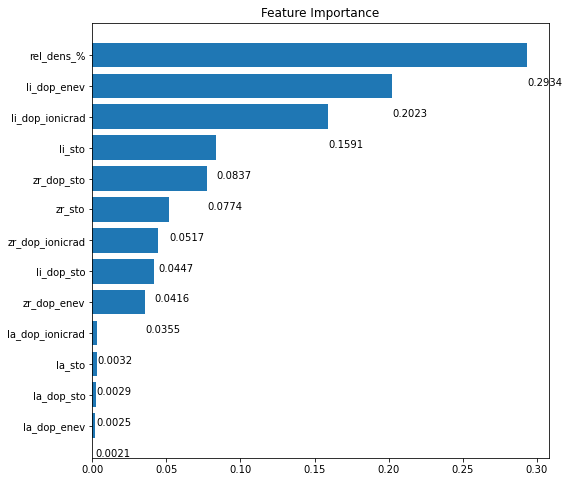

In [15]:
#Showing GradientBoostingRegressor's built-in feature importance
rf_fit = rf_opt.fit(X, y)
feat_importance = rf_fit.feature_importances_
sorted_idx = np.argsort(feat_importance)
pos = np.arange(sorted_idx.shape[0]) + 1
fig = plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.barh(pos, feat_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')
sorted_feat = feat_importance[sorted_idx]
sort_fe = []
for feat in sorted_feat:
    fe = round(feat, 4)
    sort_fe.append(fe)
for index, value in enumerate(sort_fe):
    plt.text(value, index, str(value))

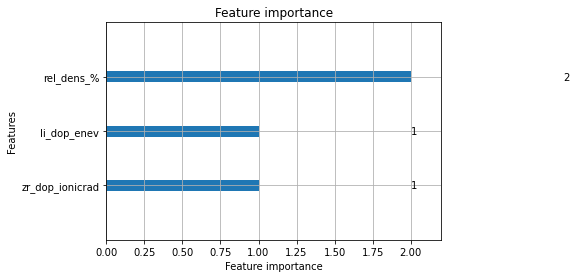

In [16]:
from lightgbm import plot_importance
lgbm_fit = lgbm_opt.fit(X, y)
plot_importance(lgbm_fit)

In [30]:
lgbm_df = study_lgbm.trials_dataframe()
rf_df = study_rf.trials_dataframe()
nu_df = study_nusvc.trials_dataframe()

In [31]:
lgbm_df.to_excel('C:/Users/USER/Documents/Kuliah/Tugas Akhir/bahan ta/Data science materials science/Dokumen Tugas Akhir/Research paper/optuna trials lgbm.xlsx', sheet_name = 'LGBM')
rf_df.to_excel('C:/Users/USER/Documents/Kuliah/Tugas Akhir/bahan ta/Data science materials science/Dokumen Tugas Akhir/Research paper/optuna trials rf.xlsx', sheet_name = 'RF')
nu_df.to_excel('C:/Users/USER/Documents/Kuliah/Tugas Akhir/bahan ta/Data science materials science/Dokumen Tugas Akhir/Research paper/optuna trials nusvc.xlsx', sheet_name = 'NuSVC')